**워터마크제거**

# 이미지 임계처리 이용
* 이미지를 흑/백으로 분류하여 처리하는 이진화를 이용해 워터마크 제거. 이때 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제가 된다. 임계값보다 크면 백, 작으면 흑이 된다.

## Simple thresholding

* 기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태이다

### cv2를 이용해 변환해 줄 이미지를 불러온다

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("D:\\test1\\watermarkTest_1.jpg",0)

### cv2.threshold(src, thresh, value, type)를 사용해 thresholding

In [11]:
ret, thresh1 = cv2.threshold(img,150,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,150,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,150,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,150,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,150,255, cv2.THRESH_TOZERO_INV)
cv2.imwrite("D:\\test1\\nonwatermarkTest_1_BINARY.jpg",thresh1)
cv2.imwrite("D:\\test1\\nonwatermarkTest_2_BINARY_INV.jpg",thresh2)
cv2.imwrite("D:\\test1\\nonwatermarkTest_3_TRUNC.jpg",thresh3)
cv2.imwrite("D:\\test1\\nonwatermarkTest_4_TOZERO.jpg",thresh4)
cv2.imwrite("D:\\test1\\nonwatermarkTest_5_TOZERO_INV.jpg",thresh5)

True

cv2.threshold(src, thresh, value, type) → retval, dst<br>
src: input image로 single-channel 이미지.(grayscale 이미지)<br>
thresh: 임계값<br>
value: 임계값을 넘었을 때 적용할 value<br>
type: thresholding type<br>

type에도 다양한 종류가 존재한다.<br>
cv2.THRESH_BINARY: threshold보다 크면 value이고 아니면 0으로 바꾸어 준다.<br>
cv2.THRESH_BINARY_INV: threshold보다 크면 0이고 아니면 value로 바꾸어 준다.<br>
cv2.THRESH_TRUNC: threshold보다 크면 value로 지정하고 작으면 기존의 값 그대로 사용한다.<br>
cv2.THRESH_TOZERO: treshold_value보다 크면 픽셀 값 그대로 작으면 0으로 할당한다.<br>
cv2.THRESH_TOZERO_INV: threshold_value보다 크면 0으로 작으면 그대로 할당해준다.

### matplotlib를 이용해 시각화

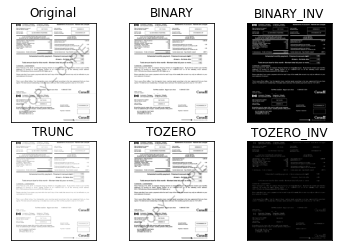

In [12]:
titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    

plt.show()

임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 된다는 한계가 있다.

## Adaptive thresholding

* 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding을 하는 것이다. 개발자가 정해준 임의의 값이 아닌 bookSize*bookSize에서 구할 수 있기 때문에 더 정확하게 threshold를 적용할 수 있다.

### cv2를 이용해 변환해 줄 이미지를 불러온다

In [22]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

img = cv2.imread("D:\\test1\\watermarkTest_1.jpg",0)

### cv2.adaptiveThreshold(img, value, adaptiveMethod, thresholdType, blockSize, C)를 사용해 thresholding

In [23]:
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
cv2.imwrite("D:\\test1\\nonwatermarkTest_6_global.jpg",th1)
cv2.imwrite("D:\\test1\\nonwatermarkTest_7_mean.jpg",th2)
cv2.imwrite("D:\\test1\\nonwatermarkTest_8_gaussian.jpg",th3)
cv2.imwrite("D:\\test1\\nonwatermarkTest_Original1.jpg",img)

True

cv2.adaptiveThreshold(img, value, adaptiveMethod, thresholdType, blockSize, C)<br>
img: gray 스케일의 값<br>
value: 문턱 값 이상이되면 사용되는 value <br>
adaptiveMethod: threshold를 구해주는데 사용되는 알고리즘<br>
blockSize: 문턱 값을 계산하기 위한 block크기(픽셀이 블럭의 중앙이 되어야 하기에 홀수)<br> 
C: 보정 상수로 이 값이 양수이면 계산된 adaptive 문턱값에서 빼고 음수이면 더해줌 <br>

adaptiveMethod type<br>
cv2.ADAPTIVE_THRESH_MEAN_C: 적용할 픽셀 (x, y)를 중심으로 하는 bookSize * bookSize안에 있는 픽셀 값의 평균에서 C를 뺀 값<br>
cv2.ADATPIVE_THRESH_GAUSSIAN_C: 적용할 픽셀 (x, y)를 중심으로 하는 bookSize * bookSize안에 있는 Gaussian 윈도우 기반 가중치들의 합에서 C를 뺀 값<br>

### matplotlib를 이용해 시각화

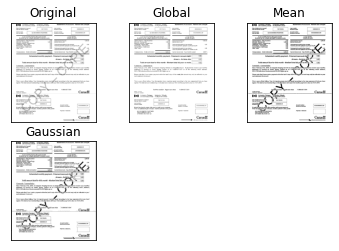

In [15]:
titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Simple thresholding를 이미지에 적용

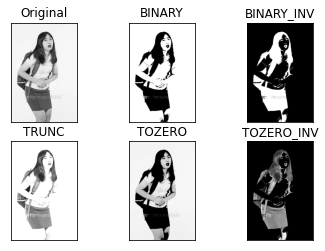

In [21]:
img = cv2.imread("D:\\test1\\femaleTeenager1.jpg",0)

ret, thresh1 = cv2.threshold(img,150,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,150,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,150,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,150,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,150,255, cv2.THRESH_TOZERO_INV)
cv2.imwrite("D:\\test1\\nonwatermarkTest_9_BINARY.jpg",thresh1)
cv2.imwrite("D:\\test1\\nonwatermarkTest_10_BINARY_INV.jpg",thresh2)
cv2.imwrite("D:\\test1\\nonwatermarkTest_11_TRUNC.jpg",thresh3)
cv2.imwrite("D:\\test1\\nonwatermarkTest_12_TOZERO.jpg",thresh4)
cv2.imwrite("D:\\test1\\nonwatermarkTest_13_TOZERO_INV.jpg",thresh5)
cv2.imwrite("D:\\test1\\nonwatermarkTest_Original2.jpg",img)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    

plt.show()

## Adaptive thresholding를 이미지에 적용

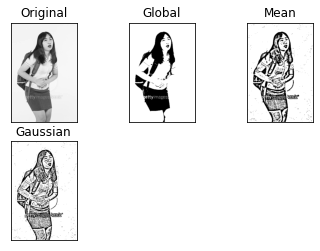

In [17]:
img = cv2.imread("D:\\test1\\femaleTeenager1.jpg",0)

ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)
cv2.imwrite("D:\\test1\\nonwatermarkTest_14_global.jpg",th1)
cv2.imwrite("D:\\test1\\nonwatermarkTest_15_mean.jpg",th2)
cv2.imwrite("D:\\test1\\nonwatermarkTest_16_gaussian.jpg",th3)

titles = ['Original','Global','Mean','Gaussian']

images = [img,th1,th2,th3]

for i in range(4):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## 한계

* Binary와 Global로 변환된 이미지를 보면 알 수 있듯이 thresholding 기법을 사용하면 워터마크 제거가 가능하다. 하지만 이미지를 흑백으로 처리하는 과정에서의 원본 이미지 손상이 심하다. 따라서 Color 이미지를 사용하는 우리 프로젝트에는 적합하지 않다.


# 고양이와 개 이미지 분류 응용(사실 그냥 dataset만 바꾸기)

* 이미지에 씌워진 워터마크를 제거하는 방법에 더 깊게 들어가면 머신러닝, 딥러닝이 필연적으로 나온다.

## 고양이와 개 이미지 분류하는 코드에 dataset만 바꿔서 실행

In [85]:
import os

base_dir = 'D:\test2'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join("D:\\test2\\WatermarkedImages", 'train')
train_dogs_dir = os.path.join("D:\\test2\\nonWatermarkedImages", 'test')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join("D:\\test2\\WatermarkedImages", 'train')
validation_dogs_dir = os.path.join("D:\\test2\\nonWatermarkedImages", 'test')
print(validation_cats_dir)
print(validation_dogs_dir)

D:\test2\WatermarkedImages\train
D:\test2\nonWatermarkedImages\test
D:\test2\WatermarkedImages\train
D:\test2\nonWatermarkedImages\test


In [86]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg']
['maleTeenager121.jpg', 'maleTeenager122.jpg', 'maleTeenager123.jpg', 'maleTeenager124.jpg', 'maleTeenager125.jpg']


In [87]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 120
Total training dog images : 39
Total validation cat images : 120
Total validation dog images : 39


In [88]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

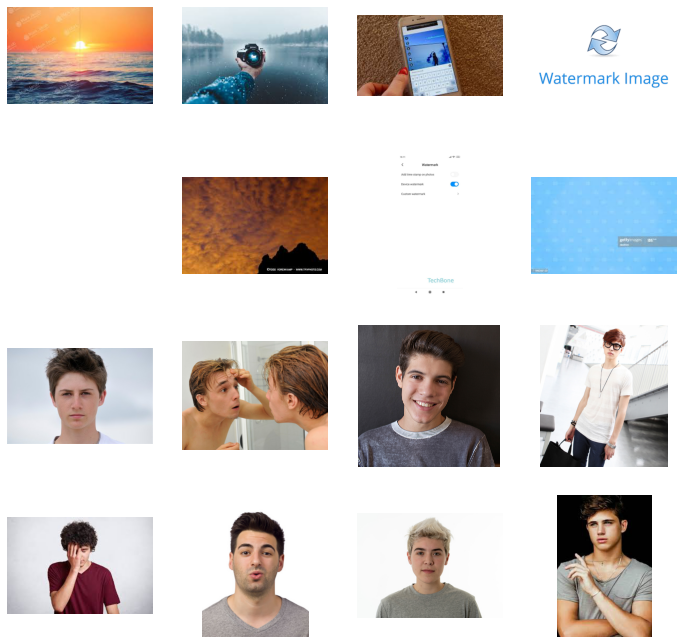

In [89]:
nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [90]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [91]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory("D:\\test2\\WatermarkedImages",
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory("D:\\test2\\nonWatermarkedImages",
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 170 images belonging to 2 classes.
Found 159 images belonging to 2 classes.


In [93]:
history = model.fit(train_generator,validation_data=validation_generator, epochs=5, batch_size=32)

Epoch 1/5
9/9 [==============================] - 3s 380ms/step - loss: 1.6914 - accuracy: 0.6059 - val_loss: 0.6005 - val_accuracy: 0.7547
Epoch 2/5
9/9 [==============================] - 3s 307ms/step - loss: 0.6671 - accuracy: 0.6294 - val_loss: 0.5744 - val_accuracy: 0.7547
Epoch 3/5
9/9 [==============================] - 3s 342ms/step - loss: 0.5923 - accuracy: 0.7118 - val_loss: 0.7188 - val_accuracy: 0.3396
Epoch 4/5
9/9 [==============================] - 3s 370ms/step - loss: 0.5417 - accuracy: 0.7588 - val_loss: 1.2407 - val_accuracy: 0.7547
Epoch 5/5
9/9 [==============================] - 3s 348ms/step - loss: 0.6163 - accuracy: 0.7706 - val_loss: 0.5868 - val_accuracy: 0.7547


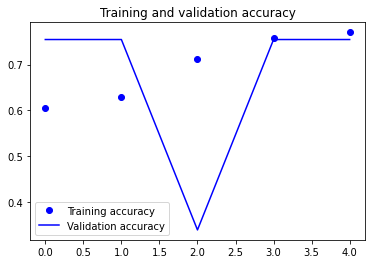

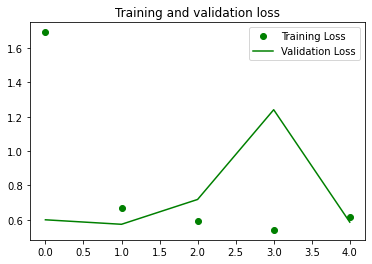

In [94]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [95]:
import numpy as np
from keras.preprocessing import image

for i in range(329):
    num=str(i)
    img_name = 'test'+ num +'.jpg'
    img_path = os.path.join("D:\\test3", img_name)

    img=image.load_img(img_path,target_size=(150, 150))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
        print(img_name + " is a watermakred")
    else:
        print(img_name + " is a nonwatermakred")

Using TensorFlow backend.


[1.]
test0.jpg is a watermakred
[1.]
test1.jpg is a watermakred
[1.]
test2.jpg is a watermakred
[1.]
test3.jpg is a watermakred
[1.]
test4.jpg is a watermakred
[1.]
test5.jpg is a watermakred
[1.]
test6.jpg is a watermakred
[1.]
test7.jpg is a watermakred
[1.]
test8.jpg is a watermakred
[1.]
test9.jpg is a watermakred
[1.]
test10.jpg is a watermakred
[1.]
test11.jpg is a watermakred
[1.]
test12.jpg is a watermakred
[1.]
test13.jpg is a watermakred
[1.]
test14.jpg is a watermakred
[1.]
test15.jpg is a watermakred
[1.]
test16.jpg is a watermakred
[1.]
test17.jpg is a watermakred
[1.]
test18.jpg is a watermakred
[1.]
test19.jpg is a watermakred
[1.]
test20.jpg is a watermakred
[1.]
test21.jpg is a watermakred
[1.]
test22.jpg is a watermakred
[1.]
test23.jpg is a watermakred
[1.]
test24.jpg is a watermakred
[1.]
test25.jpg is a watermakred
[1.]
test26.jpg is a watermakred
[1.]
test27.jpg is a watermakred
[1.]
test28.jpg is a watermakred
[1.]
test29.jpg is a watermakred
[1.]
test30.jpg is a

[1.]
test243.jpg is a watermakred
[1.]
test244.jpg is a watermakred
[1.]
test245.jpg is a watermakred
[1.]
test246.jpg is a watermakred
[1.]
test247.jpg is a watermakred
[1.]
test248.jpg is a watermakred
[1.]
test249.jpg is a watermakred
[1.]
test250.jpg is a watermakred
[1.]
test251.jpg is a watermakred
[1.]
test252.jpg is a watermakred
[1.]
test253.jpg is a watermakred
[1.]
test254.jpg is a watermakred
[1.]
test255.jpg is a watermakred
[1.]
test256.jpg is a watermakred
[1.]
test257.jpg is a watermakred
[1.]
test258.jpg is a watermakred
[1.]
test259.jpg is a watermakred
[1.]
test260.jpg is a watermakred
[1.]
test261.jpg is a watermakred
[1.]
test262.jpg is a watermakred
[1.]
test263.jpg is a watermakred
[1.]
test264.jpg is a watermakred
[1.]
test265.jpg is a watermakred
[1.]
test266.jpg is a watermakred
[1.]
test267.jpg is a watermakred
[1.]
test268.jpg is a watermakred
[1.]
test269.jpg is a watermakred
[1.]
test270.jpg is a watermakred
[1.]
test271.jpg is a watermakred
[1.]
test272.j

## 한계

* 지식이 부족한 상태에서 dataset만 바꿔서 돌려본거라 정확도가 매우 떨어진다. 이걸 해결하기위해 더 깊게 들어갔다간 주객전도

# 인간이 직접 하나하나 눈으로 보고 손으로 delete 누르기

## 이미지 파일을 열고 워터마크가 들어가있는 파일은 제거한다
* 정확도가 제일 높다

## 한계

* 데이터가 크면 시간이 많이 걸리고 그에 따라 작업자의 피로도가 지수함수 형태로 높아지므로 작업시간이 길어질수록 정확도가 급격하게 감소한다.

In [61]:
# import numpy as np

# def setNamedWindow(windowName, type): 
#     cv2.namedWindow(windowName, type) 
    
# def show(windowName, src): 
#     cv2.imshow(windowName, src)

# img = cv2.imread("D:\\test1\\watermarkTest_1.jpg", 0)
    
# setNamedWindow("original", cv2.WINDOW_NORMAL) 
# setNamedWindow("BINARY", cv2.WINDOW_NORMAL) 
# setNamedWindow("BINARY_INV", cv2.WINDOW_NORMAL) 
# setNamedWindow("TRUNC", cv2.WINDOW_NORMAL) 
# setNamedWindow("TOZERO", cv2.WINDOW_NORMAL) 
# setNamedWindow("TOZERO_INV", cv2.WINDOW_NORMAL) 
# ret, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
# ret, thr2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) 
# ret, thr3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) 
# ret, thr4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) 
# ret, thr5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV) 
# show("original", img) 
# show("BINARY", thr1) 
# show("BINARY_INV", thr2) 
# show("TRUNC", thr3) 
# show("TOZERO", thr4) 
# show("TOZERO_INV", thr5) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

In [69]:
# import cv2

# img = cv2.imread("D:\\test1\\watermarkTest_1.jpg")
# _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
# cv2.imwrite("D:\\test1\\nonwatermarkTest_1.jpg",thresh)
# cv2.imshow('Result', thresh)
# cv2.waitKey(0)
# cv2.destroyAllWindows()